In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#loading gold data
gold_data=pd.read_csv('gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
#So no null value

In [5]:
gold_data['Date']

0        1/2/2008
1        1/3/2008
2        1/4/2008
3        1/7/2008
4        1/8/2008
          ...    
2285     5/8/2018
2286     5/9/2018
2287    5/10/2018
2288    5/14/2018
2289    5/16/2018
Name: Date, Length: 2290, dtype: object

In [6]:
#now handling date
day=[]
month=[]
year=[]
for i in gold_data['Date']:
    date=i.split('/')
    day.append(int(date[1]))
    month.append(int(date[0]))
    year.append(int(date[2]))

In [7]:
gold_new_data=gold_data.drop('Date',axis=1)

In [8]:
day=pd.DataFrame(day,columns=['Day'])
month=pd.DataFrame(month,columns=['Month'])
year=pd.DataFrame(year,columns=['Year'])
gold_new_data=pd.concat([day,month,year,gold_new_data],axis=1)

In [9]:
gold_new_data.head()

,Day,Month,Year,SPX,GLD,USO,SLV,EUR/USD
0,2,1,2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,3,1,2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,4,1,2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,7,1,2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,8,1,2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
import datetime
dates=[]
for i in gold_data['Date']:
    date_str = i # The date - 29 Dec 2017
    format_str = '%m/%d/%Y' # The format
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    dates.append(datetime_obj.date())

In [11]:
dates

[datetime.date(2008, 1, 2),
 datetime.date(2008, 1, 3),
 datetime.date(2008, 1, 4),
 datetime.date(2008, 1, 7),
 datetime.date(2008, 1, 8),
 datetime.date(2008, 1, 9),
 datetime.date(2008, 1, 10),
 datetime.date(2008, 1, 11),
 datetime.date(2008, 1, 14),
 datetime.date(2008, 1, 15),
 datetime.date(2008, 1, 16),
 datetime.date(2008, 1, 17),
 datetime.date(2008, 1, 18),
 datetime.date(2008, 1, 22),
 datetime.date(2008, 1, 23),
 datetime.date(2008, 1, 24),
 datetime.date(2008, 1, 25),
 datetime.date(2008, 1, 28),
 datetime.date(2008, 1, 29),
 datetime.date(2008, 1, 30),
 datetime.date(2008, 1, 31),
 datetime.date(2008, 2, 1),
 datetime.date(2008, 2, 4),
 datetime.date(2008, 2, 5),
 datetime.date(2008, 2, 6),
 datetime.date(2008, 2, 7),
 datetime.date(2008, 2, 8),
 datetime.date(2008, 2, 11),
 datetime.date(2008, 2, 12),
 datetime.date(2008, 2, 13),
 datetime.date(2008, 2, 14),
 datetime.date(2008, 2, 15),
 datetime.date(2008, 2, 19),
 datetime.date(2008, 2, 20),
 datetime.date(2008, 2, 21

In [12]:
date_pd=pd.DataFrame(dates,columns=['Date_New'])

In [13]:
date_pd

,Date_New
0,2008-01-02
1,2008-01-03
2,2008-01-04
3,2008-01-07
4,2008-01-08
...,...
2285,2018-05-08
2286,2018-05-09
2287,2018-05-10
2288,2018-05-14


In [14]:
new_gold_data=gold_data.drop('Date',axis=1)
new_gold_data=pd.concat([date_pd,new_gold_data],axis=1)

In [15]:
new_gold_data.head()

,Date_New,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


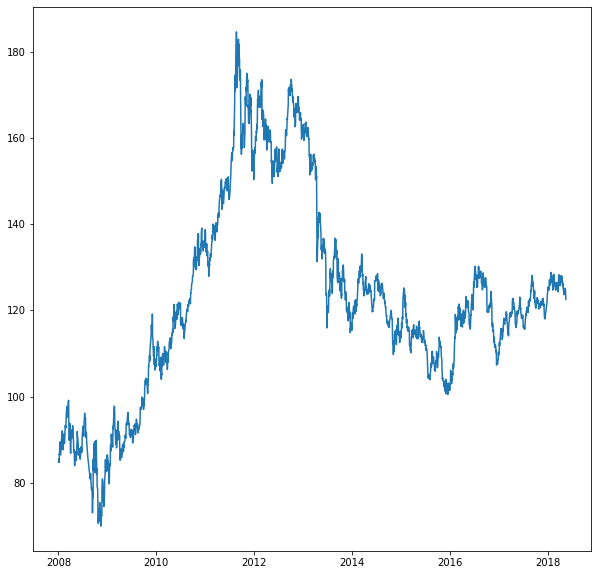

In [16]:
plt.figure(figsize=(10,10))
plt.plot(new_gold_data['Date_New'],new_gold_data['GLD'])
plt.show()

In [17]:
correlation=new_gold_data.corr()

<AxesSubplot:>

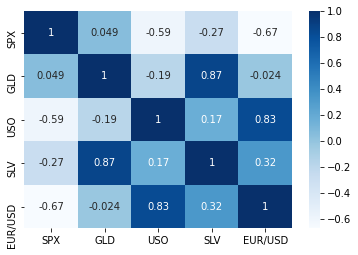

In [18]:
sns.heatmap(correlation,cmap='Blues',annot=True)

In [19]:
X=new_gold_data.drop(labels=['GLD','Date_New'],axis=1)

In [20]:
Y=new_gold_data.GLD

In [21]:
from sklearn.preprocessing import StandardScaler
minmax=StandardScaler()
new_data=minmax.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
model=DecisionTreeRegressor()

In [26]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
model.score(X_train,y_train)

1.0

In [28]:
model.score(X_test,y_test)

0.977181181312869

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [30]:
pipe=Pipeline([('classifier',LinearRegression())])

In [31]:
grid_param=[{'classifier':[LinearRegression()],},
           {'classifier':[Lasso()]},
           {'classifier':[Ridge()]},
           {'classifier':[RandomForestRegressor()],
           'classifier__n_estimators':['10','20','40','50','100','200']},
           {'classifier':[DecisionTreeRegressor()],
           'classifier__max_depth':['100','500']},
           {'classifier':[SVR()],
           'classifier__kernel':['rbf','linear']}]

In [32]:
grid_search=GridSearchCV(pipe,grid_param,cv=5,verbose=0,n_jobs=-1)

In [33]:
#best_model=grid_search.fit(X_train,y_train)

In [34]:
#best_model.best_estimator_

In [35]:
X.shape

(2290, 4)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

In [61]:
classifier=Sequential()

In [62]:
classifier.add(Dense(units=8,activation='relu',input_dim=4))

In [63]:
classifier.add(Dense(units=4,activation='relu'))

classifier.add(Dense(1,activation='linear'))



In [74]:
from tensorflow.keras.optimizers import SGD
sgd=SGD(learning_rate=0.1)
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['accuracy'])

In [75]:

model=classifier.fit(X_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
58/58 [==============================] - 0s 1ms/step - loss: 63.9569 - accuracy: 0.0000e+00
Epoch 2/10
58/58 [==============================] - 0s 1ms/step - loss: 63.8989 - accuracy: 0.0000e+00
Epoch 3/10
58/58 [==============================] - 0s 1ms/step - loss: 63.8410 - accuracy: 0.0000e+00
Epoch 4/10
58/58 [==============================] - 0s 1ms/step - loss: 63.7830 - accuracy: 0.0000e+00
Epoch 5/10
58/58 [==============================] - 0s 1ms/step - loss: 63.7251 - accuracy: 0.0000e+00
Epoch 6/10
58/58 [==============================] - 0s 1ms/step - loss: 63.6671 - accuracy: 0.0000e+00
Epoch 7/10
58/58 [==============================] - 0s 1ms/step - loss: 63.6091 - accuracy: 0.0000e+00
Epoch 8/10
58/58 [==============================] - 0s 1ms/step - loss: 63.5511 - accuracy: 0.0000e+00
Epoch 9/10
58/58 [==============================] - 0s 1ms/step - loss: 63.4932 - accuracy: 0.0000e+00
Epoch 10/10
58/58 [==============================] - 0s 1ms/step - loss: 